In [182]:
import pandas as pd
import numpy as np
from scipy.io import arff

Contract_Quote = pd.read_csv('C:/Users/bsuga/capstone_project/Data/Extract_from_Salesforce/Final_Data.csv',encoding='ISO-8859-1')
Window=pd.read_csv('C:/Users/bsuga/capstone_project/Data/Extract_from_Salesforce/Window.csv',encoding='ISO-8859-1')
Shutter=pd.read_csv('C:/Users/bsuga/capstone_project/Data/Extract_from_Salesforce/Shutter.csv',encoding='ISO-8859-1')
Window_and_Shutter=pd.read_csv('C:/Users/bsuga/capstone_project/Data/Extract_from_Salesforce/Window_and_Shutter.csv',encoding='ISO-8859-1')

In [183]:
df=Contract_Quote[['Products','Quantity','city','Discount_Sales','Sold Date - Date Only']]
df['Products'] = [1 if Products =="Window"  else 2 if Products =="Shutter"  else 3 for Products in df['Products']]
df['year'] = pd.DatetimeIndex(df['Sold Date - Date Only']).year
#df.loc[df.Products == "Window", "Products"] = 1
df.corr().style.background_gradient(cmap="Blues")

rec_com=Contract_Quote

C:\Users\bsuga\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\bsuga\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [184]:
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt




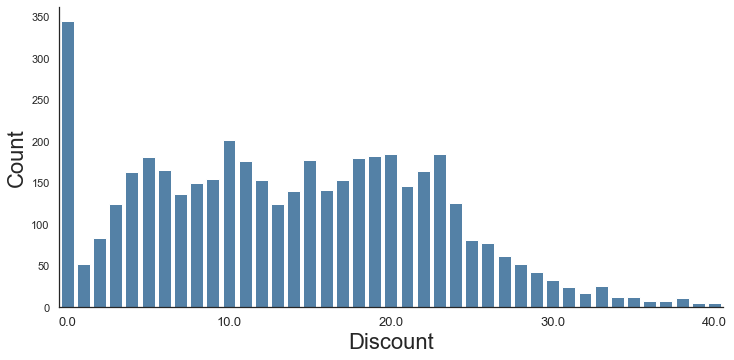

In [204]:
with sns.axes_style('white'):
    df= Contract_Quote.round(decimals = 0)
    df['Discount']=df['Discount_Sales']
    g = sns.factorplot('Discount', data=df, aspect=2,
                       kind='count', color='steelblue')
    
    g.set_xticklabels(step=10)
    plt.xticks(Fontsize=13)
    plt.xlabel('Discount', fontsize=22)
    plt.ylabel('Count', fontsize=22)

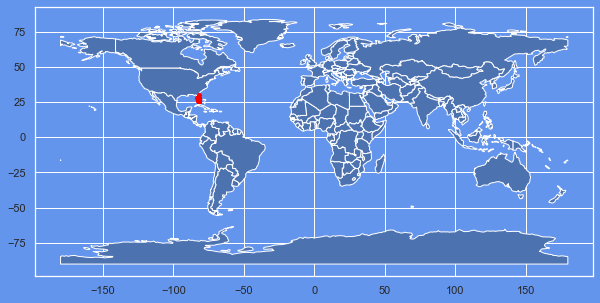

In [186]:
df= Contract_Quote


import pandas as pd
import shapely
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame



geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [187]:
df["geometry"] = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
df['Products'] = [1 if Products =="Window"  else 2 if Products =="Shutter"  else 3 for Products in df['Products']]
df.head()
df=df[["geometry","Products","Discount_Sales"]]

df.to_csv('C:/Users/bsuga/capstone_project/Data/Extract_from_Salesforce/Geomtry_Data.csv')

In [188]:
Contract_Quote['Discount_Percentage']=pd.cut(Contract_Quote.Discount_Sales, bins=[0,10,20,30,40], labels=["<10%","<20%","<30%","30%<"])
Window['Discount_Percentage']=pd.cut(Window.Discount_Sales, bins=[0,10,20,30,40], labels=["<10%","<20%","<30%","30%<"])
Shutter['Discount_Percentage']=pd.cut(Shutter.Discount_Sales, bins=[0,10,20,30,40], labels=["<10%","<20%","<30%","30%<"])
Window_and_Shutter['Discount_Percentage']=pd.cut(Window_and_Shutter.Discount_Sales, bins=[0,10,20,30,40], labels=["<10%","<20%","<30%","30%<"])

In [189]:

City_Count= Contract_Quote[['city','Discount_Sales','Discount_Percentage','Products']]
City_Count= City_Count.round(decimals = 0)

City_Count = City_Count[~City_Count['city'].isnull()]

#City_Count= City_Count.groupby(['city','Discount_Sales']).count()
City_Count.head()

,city,Discount_Sales,Discount_Percentage,Products
3,Fort Myers,15.0,<20%,2
15,Fort Myers,19.0,<20%,2
28,Cape Coral,15.0,<20%,3
29,Cape Coral,22.0,<30%,2
31,North Port,15.0,<20%,2


['Fort Myers', 'Cape Coral', 'North Port', 'Bradenton', 'Jacksonville', 'Saint Petersburg', 'Tampa', 'Sarasota', 'Largo']


Discount_Sales                                           \
                          count       mean        std   min    25%   50%   
city                                                                       
Bradenton                  13.0  12.615385   5.172660   0.0  11.00  14.0   
Cape Coral                482.0  14.512448   9.005707   0.0   8.00  15.0   
Fort Myers                380.0  17.047368   9.467783   0.0   8.75  20.0   
Jacksonville                1.0  20.000000        NaN  20.0  20.00  20.0   
Largo                       1.0   0.000000        NaN   0.0   0.00   0.0   
North Port                189.0  13.460317   6.748109   0.0   9.00  13.0   
Saint Petersburg            2.0  13.000000  15.556349   2.0   7.50  13.0   
Sarasota                    2.0   6.000000   0.000000   6.0   6.00   6.0   
Tampa                       2.0  16.500000   2.121320  15.0  15.75  16.5   

                              Products                                     \
                    75%   max    count      mean       std  min  25%  50%   
city                                                                        
Bradenton         16.00  20.0     13.0  1.923077  0.277350  1.0  2.0  2.0   
Cape Coral        21.00  38.0    482.0  1.887967  0.490979  1.0  2.0  2.0   
Fort Myers        24.00  39.0    380.0  1.976316  0.400484  1.0  2.0  2.0   
Jacksonville      20.00  20.0      1.0  2.000000       NaN  2.0  2.0  2.0   
Largo              0.00   0.0      1.0  2.000000       NaN  2.0  2.0  2.0   
North Port        17.00  37.0    189.0  2.068783  0.292693  1.0  2.0  2.0   
Saint Petersburg  18.50  24.0      2.0  2.000000  0.000000  2.0  2.0  2.0   
Sarasota           6.00   6.0      2.0  2.000000  0.000000  2.0  2.0  2.0   
Tampa             17.25  18.0      2.0  2.000000  0.000000  2.0  2.0  2.0   

                            
                  75%  max  
city                        
Bradenton         2.0  2.0  
Cape Coral        2.0  3.0  
Fort Myers        2.0  3.0  
Jacksonville      2.0  2.0  
Largo             2.0  2.0  
North Port        2.0  3.0  
Saint Petersburg  2.0  2.0  
Sarasota          2.0  2.0  
Tampa             2.0  2.0

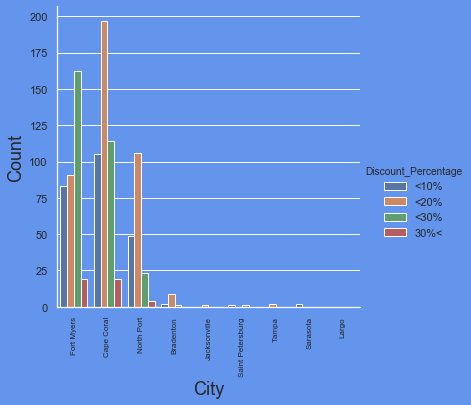

In [190]:
#City_Count.groupby(['city','Discount_Sales'])['city','Discount_Sales'].count().plot.bar()

index =City_Count['city'].unique().tolist()
print(index)
from mpl_toolkits.mplot3d import Axes3D
#sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'}) 
sns.catplot(data=City_Count,kind='count',x='city',hue='Discount_Percentage')
plt.xticks(rotation=90,Fontsize=8)
plt.xlabel('City', fontsize=18)
plt.ylabel('Count', fontsize=18)
City_Count.groupby('city').describe()


In [191]:
Contract_Quote.head()

,Unnamed: 0,Unnamed: 0.1,Contract Number,Contract ID,Quote ID,Smartview Contract ID,Products,Contract Approved,Status,Subtotal,...,office,township,state_district,retail,city_district,shop,historic,Quantity,geometry,Discount_Percentage
0,0,1,25146,8004Q000001RClb,0Q04Q000005jx3s,30207.0,2,1,Approved,7767.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,POINT (-81.73309499999998 26.21852),<20%
1,1,9,25230,8004Q000001RCpb,0Q04Q000005jwrN,30301.0,1,1,Approved,13702.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,POINT (-81.7736458 26.2629328),NaN
2,2,12,295,8001U0000003t43,0Q01U000000vVLf,28131.0,2,1,Approved,12125.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157.0,POINT (-81.7194382 26.2978145),30%<
3,3,16,297,8001U0000003t45,0Q01U000000vVOl,28229.0,2,1,Approved,7025.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,POINT (-81.7640145 26.5939644),<20%
4,4,24,301,8001U0000003t49,0Q01U000000vVSs,28370.0,2,1,Approved,6438.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,POINT (-81.7343649 26.6936664),<10%


In [192]:
rec_com=Contract_Quote
neighbourhood = rec_com[["neighbourhood","Discount_Percentage"]]
neighbourhood.dropna(subset = ['neighbourhood'], inplace=True)
neighbourhood.shape
counts = neighbourhood['neighbourhood'].value_counts()
neighbourhood = neighbourhood.loc[neighbourhood['neighbourhood'].isin(counts.index[counts > 20])]
neighbourhood.head()
neighbourhood.shape


C:\Users\bsuga\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(384, 2)

['Prato at Pelican Preserve', 'Arborwood Preserve', 'Marina Bay', 'Esplanade Golf and Country Club', 'Pelican Preserve', 'Bridgetown', 'Winding Cypress', 'Colonial Country Club', 'Tidewater', 'Botanica Lakes', 'The Plantation Somerset', 'Pelican Sound Golf & River Club']


Text(55.74090265480325, 0.5, 'Count')

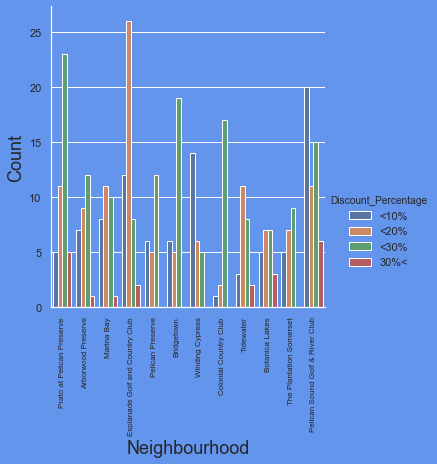

In [193]:

index =neighbourhood['neighbourhood'].unique().tolist()
print(index)
from mpl_toolkits.mplot3d import Axes3D
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'}) 
sns.catplot(data=neighbourhood,kind='count',x='neighbourhood',hue='Discount_Percentage')
plt.xticks(rotation=90,Fontsize=8)
plt.xlabel('Neighbourhood', fontsize=18)
plt.ylabel('Count', fontsize=18)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Unnamed: 0             4469 non-null   int64   
 1   Unnamed: 0.1           4469 non-null   int64   
 2   Contract Number        4469 non-null   int64   
 3   Contract ID            4469 non-null   object  
 4   Quote ID               4469 non-null   object  
 5   Smartview Contract ID  4469 non-null   float64 
 6   Products               4469 non-null   int64   
 7   Contract Approved      4469 non-null   int64   
 8   Status                 4469 non-null   object  
 9   Subtotal               4469 non-null   float64 
 10  Total Price            4469 non-null   float64 
 11  Contract Amount        4469 non-null   float64 
 12  Sales Total            4469 non-null   float64 
 13  Sold Date - Date Only  4468 non-null   object  
 14  Site Address           4469 non-null   o

C:\Users\bsuga\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(48.880518994633846, 0.5, 'Count')

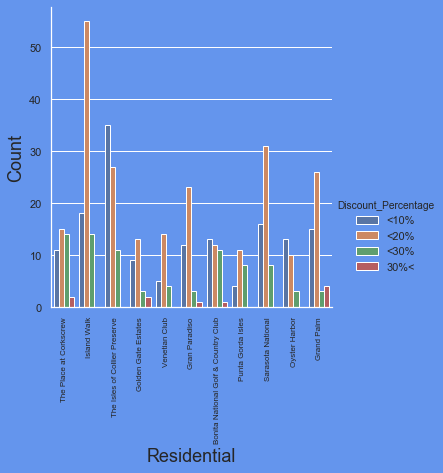

In [194]:
residential=Contract_Quote

residential= residential[["residential","Discount_Percentage"]]
residential.dropna(subset = ['residential'], inplace=True)
residential.shape
counts = residential['residential'].value_counts()
residential = residential.loc[residential['residential'].isin(counts.index[counts > 20])]
residential.shape
index =residential['residential'].unique().tolist()
print(index)
from mpl_toolkits.mplot3d import Axes3D
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'}) 
sns.catplot(data=residential,kind='count',x='residential',hue='Discount_Percentage')
plt.xticks(rotation=90,Fontsize=8)
plt.xlabel('Residential', fontsize=18)
plt.ylabel('Count', fontsize=18)

['Pelican Marsh', 'Marco Island', 'Iona', 'Venice', 'Punta Gorda', 'Cypress Lake', 'North Fort Myers', 'Pelican Bay', 'Naples', 'Englewood']


C:\Users\bsuga\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(19.172935416666668, 0.5, 'Count')

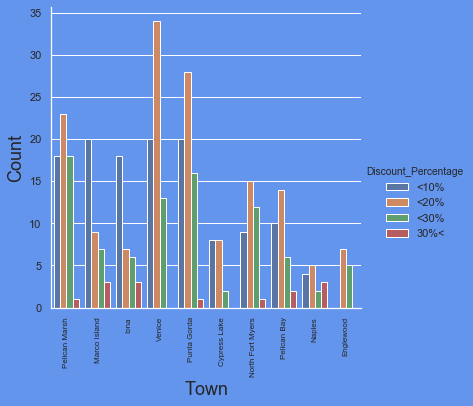

In [196]:
town=Contract_Quote
town= town[["town","Discount_Percentage"]]
town.dropna(subset = ['town'], inplace=True)
town.shape
counts = town['town'].value_counts()
town = town.loc[town['town'].isin(counts.index[counts > 10])]
residential.shape
index =town['town'].unique().tolist()
print(index)
from mpl_toolkits.mplot3d import Axes3D
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'}) 
sns.catplot(data=town,kind='count',x='town',hue='Discount_Percentage')
plt.xticks(rotation=90,Fontsize=8)
plt.xlabel('Town', fontsize=18)
plt.ylabel('Count', fontsize=18)

In [159]:

Commercial=Contract_Quote
Commercial=Commercial[["commercial","industrial","tourism","office","Discount_Percentage"]]
Commercial['Commercial']=Commercial.apply(lambda x:'%s%s%s%s' % (x['commercial'],x['industrial'],x['tourism'],x['office']),axis=1)
Commercial= Commercial[["Commercial","Discount_Percentage"]]
Commercial=Commercial[Commercial['Commercial'] != 'nannannannan']
Commercial.dropna(subset = ['Commercial'], inplace=True)
index =Commercial['Commercial'].unique().tolist()
print(index)
from mpl_toolkits.mplot3d import Axes3D
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'}) 
sns.catplot(data=Commercial,kind='Count',x='Commercial',hue='Discount_Percentage')
plt.xticks(rotation=80)
#Commercial.shape

KeyError: "['Discount_Percentage'] not in index"

C:\Users\bsuga\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\bsuga\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\bsuga\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

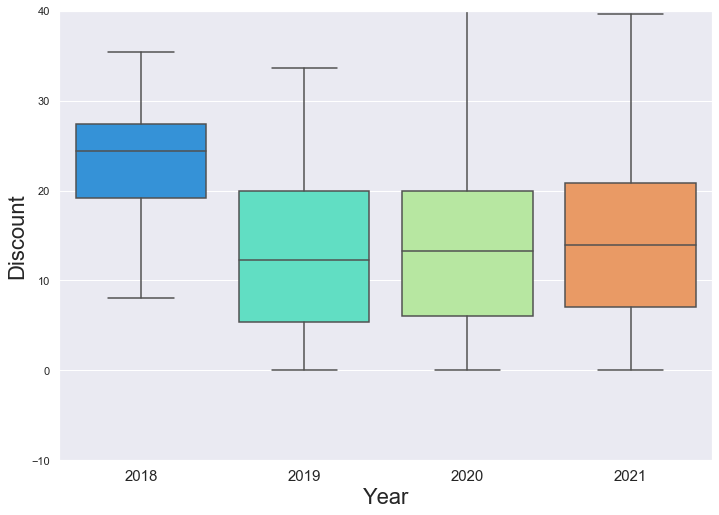

,year,Discount_Sales,Year,Discount
0,2020.0,15.492468,2020,15.492468
1,2020.0,0.000000,2020,0.000000
2,2020.0,35.496907,2020,35.496907
3,2020.0,15.003559,2020,15.003559
4,2020.0,9.350730,2020,9.350730


In [205]:
df=Contract_Quote

df['year'] =pd.DatetimeIndex(df['Sold Date - Date Only']).year
df=df[['year','Discount_Sales']]
df['Year']= df['year']
df['Discount']=df['Discount_Sales']
df.dropna(subset = ['Year'], inplace=True)
df.Year = df.Year.astype(int)
df.head()
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

plt.ylim(-10, 40)
sns.set(color_codes=True)


sns.boxplot( x=df['Year'],y=df['Discount'],palette='rainbow');
plt.xticks(Fontsize=15)
plt.xlabel('Year', fontsize=22)
plt.ylabel('Discount', fontsize=22)
plt.show()
df.head()

In [148]:
df=Contract_Quote
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Unnamed: 0             4469 non-null   int64   
 1   Unnamed: 0.1           4469 non-null   int64   
 2   Contract Number        4469 non-null   int64   
 3   Contract ID            4469 non-null   object  
 4   Quote ID               4469 non-null   object  
 5   Smartview Contract ID  4469 non-null   float64 
 6   Products               4469 non-null   int64   
 7   Contract Approved      4469 non-null   int64   
 8   Status                 4469 non-null   object  
 9   Subtotal               4469 non-null   float64 
 10  Total Price            4469 non-null   float64 
 11  Contract Amount        4469 non-null   float64 
 12  Sales Total            4469 non-null   float64 
 13  Sold Date - Date Only  4468 non-null   object  
 14  Site Address           4469 non-null   o

C:\Users\bsuga\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\bsuga\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


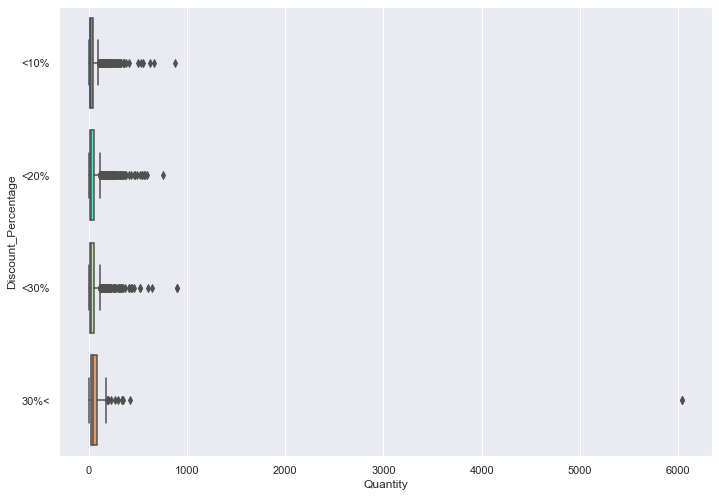

In [151]:
df=Contract_Quote


df=df[['Quantity','Discount_Percentage']]

df['Discount']=df['Discount_Percentage']
df.dropna(subset = ['Quantity'], inplace=True)
#df.Year = df.Year.astype(int)
df.head()
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

plt.ylim(-10, 40)
sns.set(color_codes=True)


sns.boxplot( x=df['Quantity'],y=df['Discount_Percentage'],palette='rainbow');
plt.show()

In [109]:
geometry = [Point(xy) for xy in zip(cities['longitude'], cities['latitude'])]



NameError: name 'cities' is not defined